In [1]:
import pandas as pd                #data manipulation 
import numpy as np                 #data manipulation 
import matplotlib.pyplot as plt    #data visualization
import seaborn as sns             #data visualization
import math
%matplotlib inline

#offline interactive plotly plots
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
#Reads the training dataset into the pandas dataframe and displays top 5 rows  

train = pd.read_csv("train.csv")    #read the traning dataset
train.head(5)                      #displaying first 10 rows from the dataset

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
#data types of different features
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
#find the features having missing values
train.isnull().sum(axis=0).sort_values(ascending = False).head(5)    

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64

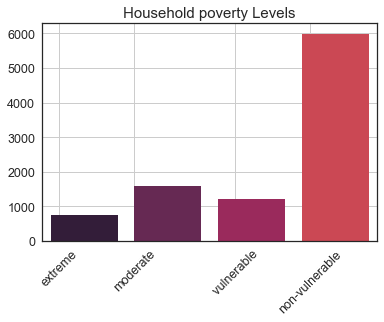

In [5]:
def class_distribution(train):
    #different types of poverty levels 
    sns.set(style="white",font_scale=1.25)  #setting style and the palette
    sns.set_palette("rocket")

    ax = sns.countplot(data= train, x = 'Target')   #use seaborn library in python for plotting

    #setting the labels on x-axis
    plt.xticks([-0.3,0.6,1.8,2.7],['extreme', 'moderate', ' vulnerable', 'non-vulnerable'], rotation = 45)
    plt.xlabel("")
    plt.ylabel("")
    plt.grid('True')
    
    #set the title 
    plt.title('Household poverty Levels');
    
class_distribution(train)

In [6]:
# Data Cleaning

In [7]:
# Correcting the incorrectly classified instances, all the members in a given family must have the same poverty level

#finding the household in which all the family members have the same poverty levels 
household_unique = train.groupby('idhogar')['Target'].nunique() == 1
#finding the household in which all the family members do not have the same poverty levels 
household_not_unique = household_unique[household_unique != True ]

#correcting the labels 
for family in household_not_unique.index:
    #select the actual label
    actual_label = int(train[(train['idhogar'] == family) & (train['parentesco1'] == 1)]['Target'])
    #correct the label
    train.loc[train['idhogar'] == family, 'Target'] = actual_label


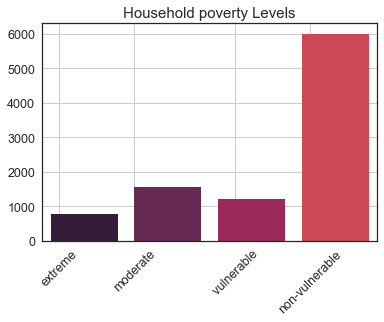

In [8]:
# Checking the class distribution after correcting the labels
class_distribution(train)

In [9]:
# Imputing the missing Values for v18q1 

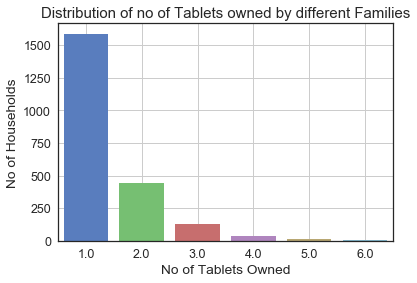

In [10]:
# v18q1  : Indicates the number of tablets household owns and is dependent on v18q which indicates if a household owns a tablet

#plotting the graph for number of Tablets Owned 
sns.set(style="white", font_scale=1.25)  #setting style and the palette
sns.set_palette("muted")
ax = sns.countplot(data = train, x = 'v18q1')
plt.title("Distribution of no of Tablets owned by different Families")
plt.xlabel("No of Tablets Owned")
plt.ylabel("No of Households");
plt.grid("True")

In [11]:
# relation of v18q1 and v18q
train.loc[(train.v18q1.isnull()), ['v18q1', 'v18q']].head(15)

#this indicates that all the households that do not own any tablet have  v18q1 value as NaN

,v18q1,v18q
0,NaN,0
2,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
11,NaN,0
12,NaN,0
15,NaN,0
16,NaN,0


In [12]:
#so replacing v18q1 = 'NaN' with zeros.
train['v18q1'] = train['v18q1'].fillna(0)

In [13]:
# Imputing the missing Values for v2a1 

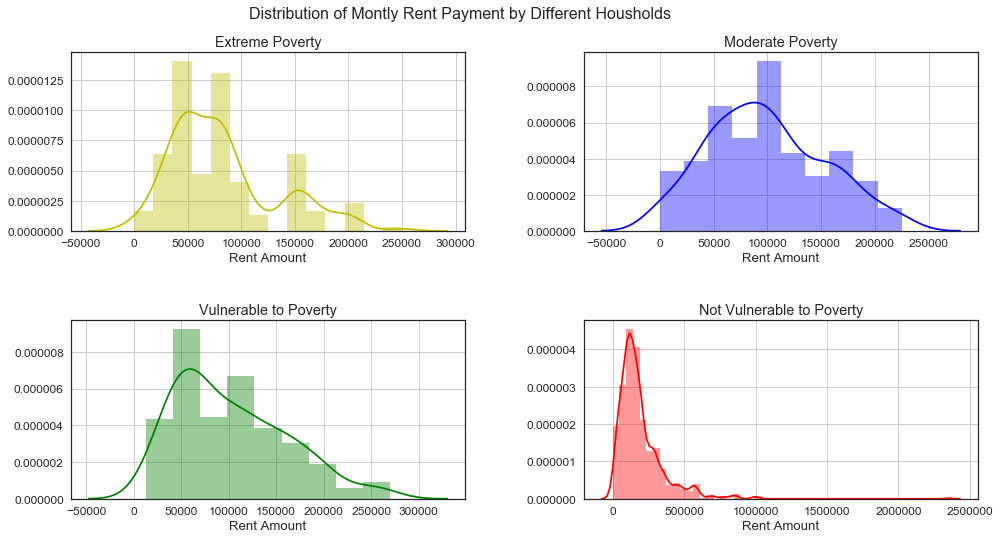

In [14]:
# v2a1  : monthly rent payment of different households

#plotting the data

def distribution_rent(train):
    sns.set(style="white", font_scale=1.2)  #setting style and the palette
    sns.set_palette("dark")

    plt.figure(1, figsize = (18,8))
    plt.suptitle('Distribution of Montly Rent Payment by Different Housholds', fontsize=16)

    plt.subplot(2, 2, 1)
    ax = sns.distplot(train.loc[(train.Target == 1), 'v2a1'].dropna(), color = 'y')
    plt.title("Extreme Poverty")
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    ax = sns.distplot(train.loc[(train.Target == 2), 'v2a1'].dropna(), color = 'b')
    plt.title("Moderate Poverty")
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    ax = sns.distplot(train.loc[(train.Target == 3), 'v2a1'].dropna(), color = 'g')
    plt.title("Vulnerable to Poverty")
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    ax = sns.distplot(train.loc[(train.Target == 4), 'v2a1'].dropna(), color = 'r')
    plt.title("Not Vulnerable to Poverty");
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.5, top=0.9);
 
distribution_rent(train)

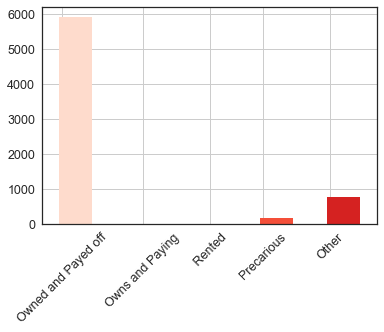

In [15]:
#distribiution of missing rent payment with types of rent payment methods tipovivi*
rent_mode = [rent for rent in train if rent.startswith('tipov') ]

#find the households having missing rent payments
sns.set(style="white", font_scale=1.25)  #setting style and the palette
sns.set_palette("Reds")
train.loc[(train.v2a1.isnull()), rent_mode].sum().plot(kind = 'bar');
plt.xticks([-0.2, 1, 2, 2.8, 3.8],['Owned and Payed off', 'Owns and Paying', ' Rented', 'Precarious', 'Other'], rotation = 45);
plt.grid(True)

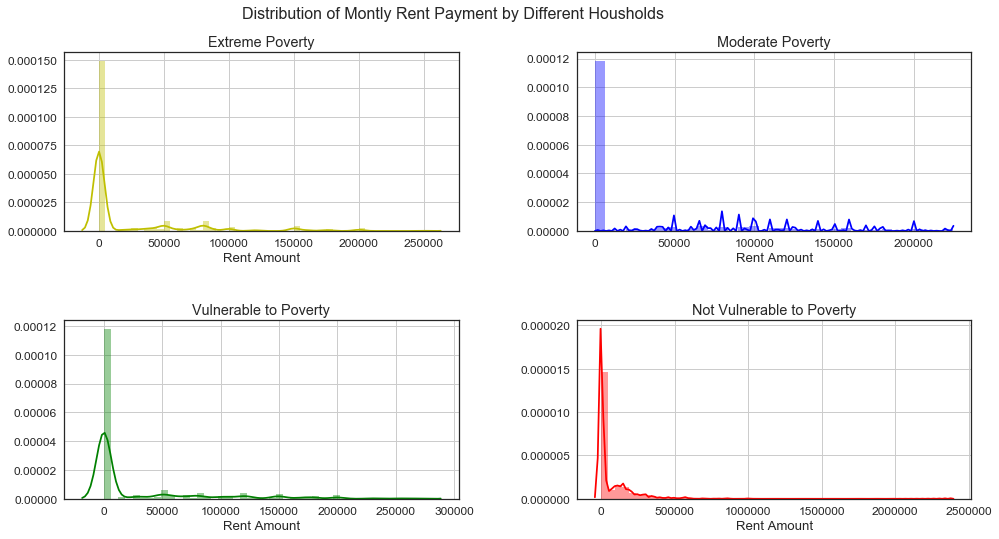

In [16]:
#this indicates that majority of the households having missing values in the rent payment have their houses fully owmed 
#and the rent is paid completely, therfore, can be subsituted with 0

train.loc[(train.tipovivi1 == 1), 'v2a1'] = 0   #replace with zero

#check the distribution

distribution_rent(train)

In [17]:
#imputing missing values for rez_esc 

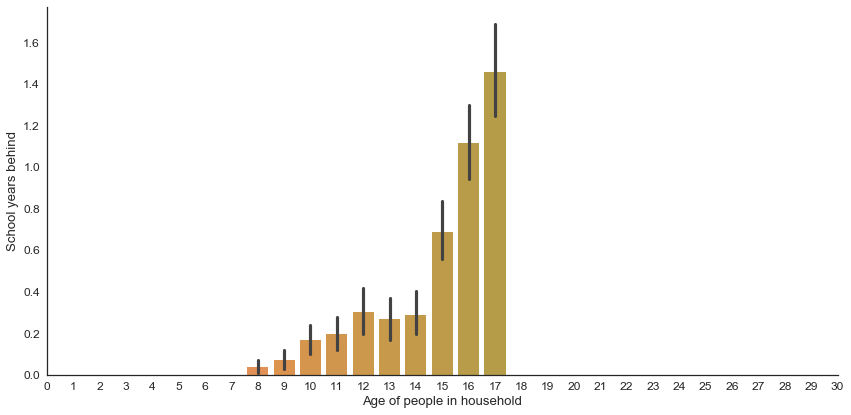

In [18]:
# rez_esc: indicates the number of school years behind, has a correlation with age 
#missing values may indicate that the either have no childern or they have childern that are older that they do not go to school

#plot age and rez_esc
fg = sns.factorplot(x='age', y='rez_esc',size=6,  aspect=2, kind='bar',data=train)
plt.xlim(0, 30);
plt.xlabel("Age of people in household")
plt.ylabel("School years behind");

#this indicates that the childern age of 8 -  17 goes to school, it is either zero or nan Else where
#can impute with 0 elsewhere


In [19]:
#distrbution of age and rez_esc having no null values
train.loc[(train.rez_esc.notnull()), 'age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [20]:
#distrbution of age and rez_esc having  null values
train.loc[(train.rez_esc.isnull()), 'age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [21]:
#replacing null with zeros for all the people having age > 19 anf less than 7
train.loc[((train.age >  17) | (train.age < 7)) & (train.rez_esc.isnull()), 'rez_esc'] = 0

In [22]:
train.loc[train.rez_esc.isnull(), 'age']   #one outlier, age 10 and have null value

2514    10
Name: age, dtype: int64

In [23]:
#SQBmeaned : square of the mean years of education of adults (>=18) in the household
#meaneduc  : average years of education for adults (18+)
train.loc[(train.SQBmeaned.isnull()) | (train.meaneduc.isnull()), ['idhogar','SQBmeaned', 'meaneduc']]

#can replace meaneduc with avegrage of  all the years of education of adults (>=18) in the household and 
#SQBmeaned with its square

,idhogar,SQBmeaned,meaneduc
1291,1b31fd159,NaN,NaN
1840,a874b7ce7,NaN,NaN
1841,a874b7ce7,NaN,NaN
2049,faaebf71a,NaN,NaN
2050,faaebf71a,NaN,NaN


In [24]:
#replace with mean values 
train.meaneduc = train.meaneduc.fillna(train.meaneduc.mean())

#replace with squared value
missing_SQBmeaned =  train.loc[(train.SQBmeaned.isnull()), ['idhogar','SQBmeaned', 'meaneduc']]
missing_SQBmeaned

,idhogar,SQBmeaned,meaneduc
1291,1b31fd159,NaN,9.231523
1840,a874b7ce7,NaN,9.231523
1841,a874b7ce7,NaN,9.231523
2049,faaebf71a,NaN,9.231523
2050,faaebf71a,NaN,9.231523


In [25]:
squared_meaneduc =  float(missing_SQBmeaned['meaneduc'].iloc[0]) ** 2

#fill with squared value
train.SQBmeaned = train.SQBmeaned.fillna(squared_meaneduc)

# Changing the datatypes of object columns

In [26]:
train.select_dtypes(include=['object']).head(5)    #select the object datatypes, ignore the id features

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [27]:
# change dependency datatype to float by replaceing yes with 1 and no with zero

train.loc[(train.dependency  == 'yes') , 'dependency'] = 1
train.loc[(train.dependency  == 'no'), 'dependency'] = 0
train.dependency = train.dependency.astype(float)

In [28]:
#edjefe
train.loc[(train.edjefe  == 'yes') , 'edjefe'] = 1
train.loc[(train.edjefe  == 'no'), 'edjefe'] = 0
train.edjefe = train.edjefe.astype(float)

In [29]:
#edjefa
train.loc[(train.edjefa  == 'yes') , 'edjefa'] = 1
train.loc[(train.edjefa  == 'no'), 'edjefa'] = 0
train.edjefa = train.edjefa.astype(float)

In [30]:
train.isnull().sum(axis=0).sort_values(ascending = False).head(5)    

v2a1          949
rez_esc         1
Target          0
public          0
sanitario2      0
dtype: int64

# Cross Correlation Analysis

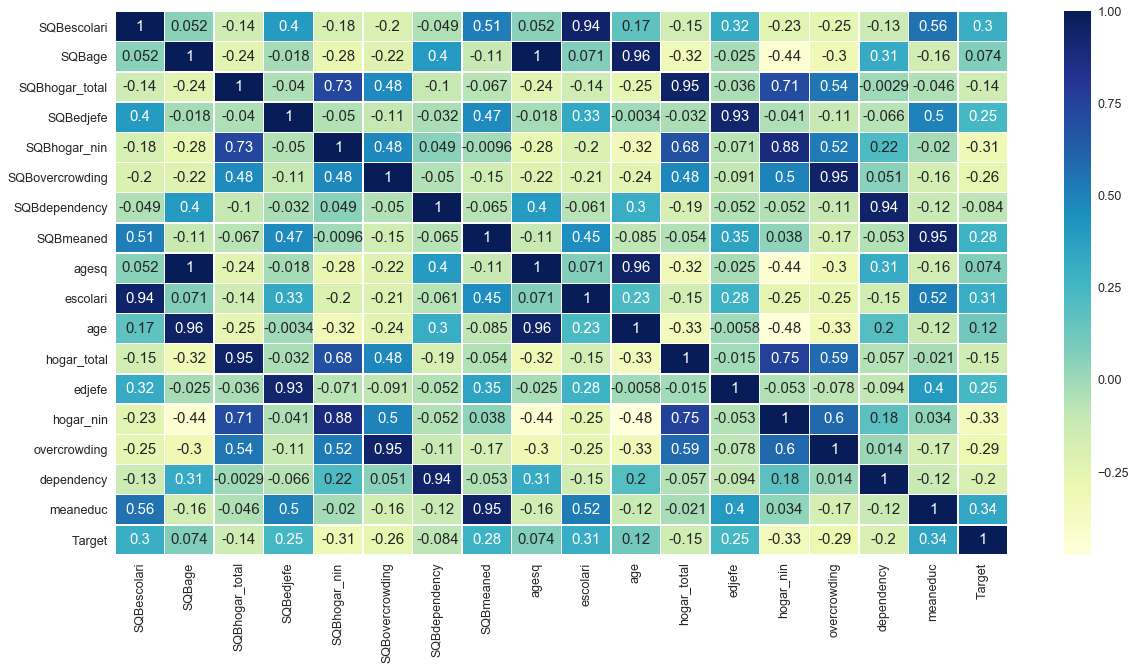

In [31]:
# Squared Variables 

# SQBescolari, escolari squared
# SQBage, age squared
# SQBhogar_total, hogar_total squared
# SQBedjefe, edjefe squared
# SQBhogar_nin, hogar_nin squared
# SQBovercrowding, overcrowding squared
# SQBdependency, dependency squared
# SQBmeaned, square of the mean years of education of adults (>=18) in the household
# agesq, Age squared

squared_features = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency'
                   ,'SQBmeaned', 'agesq', 'escolari', 'age', 'hogar_total', 'edjefe', 'hogar_nin', 'overcrowding', 'dependency', 'meaneduc', 'Target']

f =  plt.figure(figsize=(20, 10))
corr = train[squared_features].corr()
# plot the heatmap
sns.set(font_scale = 1.25)
sns.heatmap(corr, annot = True, cmap="YlGnBu", linewidths=.5);

#can drop the squared variables 

In [32]:
train.drop(columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBovercrowding', 'SQBdependency'
                    ,'SQBmeaned', 'agesq'])

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBhogar_nin,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,0,0,0,0,0,1,0,43,0,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,0,0,0,0,0,1,0,67,0,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,0,0,0,0,0,1,0,92,0,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,0,0,0,0,0,1,0,17,4,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,0,0,0,0,0,1,0,37,4,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,0,0,0,0,0,1,0,38,4,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,0,0,0,0,0,1,0,8,4,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,0,...,0,0,0,0,0,1,0,7,4,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,0,0,0,0,0,1,0,30,4,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,0.0,0,...,0,0,0,0,0,1,0,28,4,4


In [33]:
#household variables 

In [34]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [35]:
# household variables
#head_household = train.loc[(train.parentesco1 == 1), :]
head_household = train[hh_bool + hh_ordered + hh_cont]


#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

to_drop

#['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

NameError: name 'upper' is not defined

In [ ]:
corr_matrix = head_household.corr()
# Select upper triangle of correlation matrix
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = 'YlOrRd', fmt='.3f', linewidths=.5);

In [ ]:
head_household = head_household.drop(columns = ['r4t3', 'hogar_total', 'tamhog'])

In [ ]:
corr_matrix = head_household.corr()
# Select upper triangle of correlation matrix
sns.heatmap(corr_matrix.loc[corr_matrix['area2'].abs() > 0.9, corr_matrix['area2'].abs() > 0.9],
            annot=True, cmap = 'YlGnBu', fmt='.3f', linewidths=.5);

In [ ]:
corr_matrix = head_household.corr()
# Select upper triangle of correlation matrix
sns.heatmap(corr_matrix.loc[corr_matrix['hhsize'].abs() > 0.9, corr_matrix['hhsize'].abs() > 0.9],
            annot=True, cmap = 'YlGnBu', fmt='.3f', linewidths=.5);

In [ ]:
corr_matrix = head_household.corr()
# Select upper triangle of correlation matrix
sns.heatmap(corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9],
            annot=True, cmap = 'YlGnBu', fmt='.3f', linewidths=.5);